In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
import tensorflow as tf
import keras

In [3]:
dataset_train = pd.read_csv('output_Result0.csv')


In [4]:
dataset_train

,F1,F2,F3,F4
0,401.203,1003.485,949.140,792.094
1,421.250,1021.578,925.547,788.015
2,425.719,1035.750,907.328,704.781
3,431.235,1042.703,900.469,766.844
4,433.390,1044.985,902.468,781.000
...,...,...,...,...
632,209.157,482.406,623.969,714.625
633,202.657,491.234,627.188,690.843
634,203.046,492.938,615.297,720.390
635,107.875,419.500,693.657,744.625


In [5]:
dataset_train=dataset_train.rolling(10).mean()

In [6]:
dataset_train

,F1,F2,F3,F4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
632,186.1922,471.4906,650.2078,736.2451
633,186.3235,473.4359,651.3828,732.0997
634,186.9906,475.8813,652.2797,733.2419
635,192.5687,486.7563,647.7283,724.8138


In [7]:
dataset_train.head(10)

,F1,F2,F3,F4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,434.311,1037.8001,901.6749,741.1248


In [8]:
dataset_train=dataset_train.iloc[9:,:].values

In [9]:
dataset_train

array([[ 434.311 , 1037.8001,  901.6749,  741.1248],
       [ 439.2438, 1041.3719,  895.6578,  733.381 ],
       [ 439.9047, 1040.8891,  887.2797,  722.4185],
       ...,
       [ 186.9906,  475.8813,  652.2797,  733.2419],
       [ 192.5687,  486.7563,  647.7283,  724.8138],
       [ 189.6234,  481.9984,  642.6893,  723.8966]])

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_train_scaled = sc.fit_transform(dataset_train)

In [11]:
dataset_train_scaled

array([[0.96737777, 0.90778795, 0.80694798, 0.37373319],
       [0.97863714, 0.91125169, 0.79699429, 0.35879472],
       [0.98014568, 0.91078349, 0.78313496, 0.3376471 ],
       ...,
       [0.4028562 , 0.36286962, 0.3943901 , 0.35852639],
       [0.4155885 , 0.37341561, 0.38686102, 0.34226784],
       [0.4088657 , 0.36880165, 0.37852534, 0.34049848]])

In [12]:
dataset_train_scaled.shape

(628, 4)

In [13]:
dataset_train_result = pd.read_csv('SOH_RESULT12.csv')


In [14]:
dataset_train_result

,SOH
0,0.928244
1,0.923164
2,0.917675
3,0.917631
4,0.917323
...,...
632,0.677398
633,0.670526
634,0.666465
635,0.665487


In [15]:
dataset_train_result=dataset_train_result.rolling(10).mean()

In [16]:
dataset_train_result

,SOH
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
632,0.686977
633,0.683707
634,0.680679
635,0.677815


In [17]:
dataset_train_result.head(10)

,SOH
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,0.917701


In [18]:
dataset_train_result=dataset_train_result.iloc[9:,:].values

In [19]:
dataset_train_result

array([[0.91770118],
       [0.91610779],
       [0.91450152],
       [0.91342167],
       [0.91233057],
       [0.91072819],
       [0.90905045],
       [0.90742212],
       [0.9062877 ],
       [0.90518789],
       [0.90630852],
       [0.90744841],
       [0.90854719],
       [0.90914862],
       [0.90973227],
       [0.91088145],
       [0.91147766],
       [0.91208714],
       [0.9126322 ],
       [0.9126316 ],
       [0.91048415],
       [0.91070341],
       [0.91042974],
       [0.9096061 ],
       [0.90858091],
       [0.90727069],
       [0.90599129],
       [0.90439899],
       [0.9023522 ],
       [0.90086581],
       [0.89905556],
       [0.89458119],
       [0.89142686],
       [0.88909488],
       [0.88645091],
       [0.88357453],
       [0.88095694],
       [0.88149199],
       [0.88199975],
       [0.88171608],
       [0.88117336],
       [0.88040114],
       [0.87910614],
       [0.87779384],
       [0.8765234 ],
       [0.87522125],
       [0.87394335],
       [0.869

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_setY_scaled = sc.fit_transform(dataset_train_result)

In [21]:
training_setY_scaled.shape


(628, 1)

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and remaining data
X_train, X_rem, y_train, y_rem = train_test_split(dataset_train_scaled, training_setY_scaled, test_size=0.3,shuffle=False, random_state=42)



In [23]:

# Split the remaining data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5,shuffle=False, random_state=42)

In [24]:
X_train


array([[0.96737777, 0.90778795, 0.80694798, 0.37373319],
       [0.97863714, 0.91125169, 0.79699429, 0.35879472],
       [0.98014568, 0.91078349, 0.78313496, 0.3376471 ],
       ...,
       [0.46714587, 0.62600255, 0.70547366, 0.35846986],
       [0.4637791 , 0.62283866, 0.70320174, 0.36007351],
       [0.45968124, 0.61891729, 0.70050831, 0.36243047]])

In [25]:
print(X_train.shape), print(y_train.shape),print(X_val.shape), print(y_val.shape),print(X_test.shape), print(y_test.shape)

(439, 4)
(439, 1)
(94, 4)
(94, 1)
(95, 4)
(95, 1)


(None, None, None, None, None, None)

In [26]:
(X_train.shape[1], 1)

(4, 1)

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU,LSTM,SimpleRNN
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Activation
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense,add, concatenate
from keras.callbacks import Callback
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras import regularizers

In [28]:

initial_lr = 0.01
decay_rate = 0.99
decay_steps = 10000

class LearningRateUpdater(Callback):
    def __init__(self, initial_lr, decay_rate, decay_steps):
        super(LearningRateUpdater, self).__init__()
        self.initial_lr = initial_lr
        self.decay_rate = decay_rate
        self.decay_steps = decay_steps

    def on_epoch_begin(self, epoch, logs=None):
        lr = self.initial_lr * math.pow(self.decay_rate, (epoch + 1) // self.decay_steps)
        self.model.optimizer.lr.assign(lr)
        print("Learning rate updated to:", lr)


# Create the optimizer with the initial learning rate
optimizer = Adam(learning_rate=initial_lr)




# Create the learning rate updater callback
lr_updater_callback = LearningRateUpdater(initial_lr, decay_rate, decay_steps)



In [29]:
# def lr_scheduler(epoch, lr):
#     if epoch % 10000 == 0 and epoch > 0:
#         lr *= 0.99
#     return lr
# def lr_scheduler(epoch, lr):
        
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr, decay_steps=decay_steps, decay_rate=decay_rate, staircase=False)


# lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

In [30]:
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

In [31]:
class LearningRateLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        if isinstance(lr, tf.keras.optimizers.schedules.LearningRateSchedule):
            lr = lr(self.model.optimizer.iterations)
        print(f'\nLearning rate after epoch {epoch} is {lr:.4f}\n')

In [32]:
input_shape =(X_train.shape[1], 1)
input = Input(shape=input_shape)

In [33]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense,add, concatenate, Dropout, Reshape,Lambda,Flatten

# Define the first parallel recurrent layer with return_sequences=True
rnn_1 =LSTM(units=11)(input)
dropout1 = Dropout(rate=0.171)(rnn_1)


# Define the second parallel recurrent layer
rnn_2 = LSTM(units=11)(input)
dropout2 = Dropout(rate=0.171)(rnn_2)

# Define the third recurrent layer with return_sequences=True
rnn_3 =LSTM(units=11)(input)
dropout3 = Dropout(rate=0.171)(rnn_3)

# Define the fourthd parallel recurrent layer
rnn_4 = LSTM(units=11)(input)
dropout4 = Dropout(rate=0.171)(rnn_4)



# Concatenate the outputs of the recurrent layers
merged = concatenate([dropout1, dropout2,dropout3, dropout4], axis=1)

dense1 = Dense(units=25, activation='tanh', kernel_regularizer=regularizers.l1(0.001))(merged)
dense1 = BatchNormalization()(dense1)
dense2 = Dense(units=25, activation='relu', kernel_regularizer=regularizers.l1(0.001))(dense1)
dense2 = BatchNormalization()(dense2)

# Flatten the merged output
#flatten = Flatten()(merged)


# activation =Activation('tanh')(flatten)
# dense1 = Dense(units=50)(activation)
# activation2 = Activation('relu')(dense1)
#dense2 = Dense(units=1)(activation2)
#activation3 = Activation('sigmoid')(dense2)


# Define the output layer
output = Dense(units=1, activation='sigmoid')(dense2)

# Create the model with the inputs and output
model = Model(inputs=[input], outputs=output)

# Compile the model with the desired optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model with the training data
model.fit([X_train], y_train, epochs=1000, batch_size=25, validation_data=([X_val], y_val), callbacks=[LearningRateLogger()])


Epoch 1/1000
 1/18 [>.............................] - ETA: 45s - loss: 0.3668 - mae: 0.2563
Learning rate after epoch 0 is 0.0100

18/18 [==============================] - 3s 40ms/step - loss: 0.2713 - mae: 0.1447 - val_loss: 0.2240 - val_mae: 0.1653
Epoch 2/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.2010 - mae: 0.0734
Learning rate after epoch 1 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.1707 - mae: 0.0823 - val_loss: 0.1486 - val_mae: 0.1464
Epoch 3/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.1276 - mae: 0.0547
Learning rate after epoch 2 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.1056 - mae: 0.0648 - val_loss: 0.0988 - val_mae: 0.1492
Epoch 4/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0780 - mae: 0.0497
Learning rate after epoch 3 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0649 - mae: 0.0653 - val_loss: 0.0698 - val_mae: 0.1543
Ep

Epoch 34/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0046 - mae: 0.0315
Learning rate after epoch 33 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0062 - mae: 0.0472 - val_loss: 0.0169 - val_mae: 0.1123
Epoch 35/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0053 - mae: 0.0365
Learning rate after epoch 34 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0051 - mae: 0.0405 - val_loss: 0.0272 - val_mae: 0.1339
Epoch 36/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0060 - mae: 0.0468
Learning rate after epoch 35 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0056 - mae: 0.0433 - val_loss: 0.0047 - val_mae: 0.0381
Epoch 37/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0055 - mae: 0.0421
Learning rate after epoch 36 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0061 - mae: 0.0449 - val_loss: 0.0150 - val_mae: 0.1

Epoch 67/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0056 - mae: 0.0396
Learning rate after epoch 66 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0060 - mae: 0.0433 - val_loss: 0.0124 - val_mae: 0.0739
Epoch 68/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0080 - mae: 0.0615
Learning rate after epoch 67 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0076 - mae: 0.0529 - val_loss: 0.0678 - val_mae: 0.2246
Epoch 69/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0081 - mae: 0.0520
Learning rate after epoch 68 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0076 - mae: 0.0497 - val_loss: 0.0270 - val_mae: 0.1519
Epoch 70/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0060 - mae: 0.0383
Learning rate after epoch 69 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0068 - mae: 0.0487 - val_loss: 0.0189 - val_mae: 0.1

Epoch 100/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0071 - mae: 0.0556
Learning rate after epoch 99 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0057 - mae: 0.0451 - val_loss: 0.0487 - val_mae: 0.2034
Epoch 101/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0039 - mae: 0.0278
Learning rate after epoch 100 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0082 - mae: 0.0600 - val_loss: 0.0384 - val_mae: 0.1847
Epoch 102/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0065 - mae: 0.0533
Learning rate after epoch 101 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0096 - mae: 0.0671 - val_loss: 0.0283 - val_mae: 0.1575
Epoch 103/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0127 - mae: 0.0814
Learning rate after epoch 102 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0087 - mae: 0.0585 - val_loss: 0.0038 - val_m

Epoch 133/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0063 - mae: 0.0528
Learning rate after epoch 132 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0070 - mae: 0.0518 - val_loss: 0.0067 - val_mae: 0.0469
Epoch 134/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0080 - mae: 0.0594
Learning rate after epoch 133 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0064 - mae: 0.0493 - val_loss: 0.0119 - val_mae: 0.0777
Epoch 135/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0055 - mae: 0.0457
Learning rate after epoch 134 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0083 - mae: 0.0588 - val_loss: 0.0138 - val_mae: 0.0894
Epoch 136/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0063 - mae: 0.0468
Learning rate after epoch 135 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0080 - mae: 0.0567 - val_loss: 0.0153 - val_

Epoch 166/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0044 - mae: 0.0257
Learning rate after epoch 165 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0075 - mae: 0.0538 - val_loss: 0.0088 - val_mae: 0.0697
Epoch 167/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0058 - mae: 0.0380
Learning rate after epoch 166 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0080 - mae: 0.0572 - val_loss: 0.0088 - val_mae: 0.0672
Epoch 168/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0053 - mae: 0.0350
Learning rate after epoch 167 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0086 - mae: 0.0570 - val_loss: 0.0239 - val_mae: 0.1269
Epoch 169/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0051 - mae: 0.0355
Learning rate after epoch 168 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0076 - mae: 0.0433 - val_loss: 0.0485 - val_

Epoch 199/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0060 - mae: 0.0499
Learning rate after epoch 198 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0064 - mae: 0.0480 - val_loss: 0.0054 - val_mae: 0.0472
Epoch 200/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0157 - mae: 0.1029
Learning rate after epoch 199 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0081 - mae: 0.0584 - val_loss: 0.0078 - val_mae: 0.0686
Epoch 201/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0042 - mae: 0.0327
Learning rate after epoch 200 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0063 - mae: 0.0463 - val_loss: 0.0093 - val_mae: 0.0783
Epoch 202/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0049 - mae: 0.0380
Learning rate after epoch 201 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0080 - mae: 0.0558 - val_loss: 0.0036 - val_

Epoch 232/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0038 - mae: 0.0269
Learning rate after epoch 231 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0088 - mae: 0.0626 - val_loss: 0.0377 - val_mae: 0.1838
Epoch 233/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0062 - mae: 0.0456
Learning rate after epoch 232 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0075 - mae: 0.0531 - val_loss: 0.1049 - val_mae: 0.3126
Epoch 234/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0079 - mae: 0.0645
Learning rate after epoch 233 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0080 - mae: 0.0535 - val_loss: 0.1518 - val_mae: 0.3811
Epoch 235/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0058 - mae: 0.0331
Learning rate after epoch 234 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0079 - mae: 0.0510 - val_loss: 0.0929 - val_

Epoch 265/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0078 - mae: 0.0599
Learning rate after epoch 264 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0065 - mae: 0.0492 - val_loss: 0.0218 - val_mae: 0.1305
Epoch 266/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0055 - mae: 0.0436
Learning rate after epoch 265 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0092 - mae: 0.0610 - val_loss: 0.0292 - val_mae: 0.1567
Epoch 267/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0037 - mae: 0.0223
Learning rate after epoch 266 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0064 - mae: 0.0475 - val_loss: 0.0288 - val_mae: 0.1318
Epoch 268/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0050 - mae: 0.0413
Learning rate after epoch 267 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0060 - mae: 0.0480 - val_loss: 0.0349 - val_

Epoch 298/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0128 - mae: 0.0832
Learning rate after epoch 297 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0080 - mae: 0.0565 - val_loss: 0.0060 - val_mae: 0.0556
Epoch 299/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0045 - mae: 0.0360
Learning rate after epoch 298 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0075 - mae: 0.0573 - val_loss: 0.0118 - val_mae: 0.0843
Epoch 300/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0058 - mae: 0.0448
Learning rate after epoch 299 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0064 - mae: 0.0492 - val_loss: 0.0063 - val_mae: 0.0538
Epoch 301/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0091 - mae: 0.0709
Learning rate after epoch 300 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0077 - mae: 0.0552 - val_loss: 0.0081 - val_

Epoch 331/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0046 - mae: 0.0347
Learning rate after epoch 330 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0059 - mae: 0.0446 - val_loss: 0.0037 - val_mae: 0.0244
Epoch 332/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0049 - mae: 0.0382
Learning rate after epoch 331 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0069 - mae: 0.0511 - val_loss: 0.0114 - val_mae: 0.0892
Epoch 333/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0049 - mae: 0.0426
Learning rate after epoch 332 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0064 - mae: 0.0502 - val_loss: 0.0059 - val_mae: 0.0544
Epoch 334/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0036 - mae: 0.0246
Learning rate after epoch 333 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0053 - mae: 0.0407 - val_loss: 0.0047 - val_

Epoch 364/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0052 - mae: 0.0431
Learning rate after epoch 363 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0061 - mae: 0.0459 - val_loss: 0.0142 - val_mae: 0.0806
Epoch 365/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0047 - mae: 0.0390
Learning rate after epoch 364 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0068 - mae: 0.0519 - val_loss: 0.0413 - val_mae: 0.1626
Epoch 366/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0056 - mae: 0.0402
Learning rate after epoch 365 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0070 - mae: 0.0467 - val_loss: 0.2700 - val_mae: 0.4961
Epoch 367/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0130 - mae: 0.0865
Learning rate after epoch 366 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0062 - mae: 0.0436 - val_loss: 0.1380 - val_

Epoch 397/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0039 - mae: 0.0252
Learning rate after epoch 396 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0070 - mae: 0.0481 - val_loss: 0.0100 - val_mae: 0.0778
Epoch 398/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0046 - mae: 0.0291
Learning rate after epoch 397 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0072 - mae: 0.0514 - val_loss: 0.0092 - val_mae: 0.0688
Epoch 399/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0045 - mae: 0.0324
Learning rate after epoch 398 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0055 - mae: 0.0414 - val_loss: 0.0087 - val_mae: 0.0707
Epoch 400/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0049 - mae: 0.0357
Learning rate after epoch 399 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0056 - mae: 0.0430 - val_loss: 0.0098 - val_

Epoch 430/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0069 - mae: 0.0549
Learning rate after epoch 429 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0067 - mae: 0.0509 - val_loss: 0.0062 - val_mae: 0.0537
Epoch 431/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0066 - mae: 0.0573
Learning rate after epoch 430 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0062 - mae: 0.0465 - val_loss: 0.1104 - val_mae: 0.3236
Epoch 432/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0041 - mae: 0.0282
Learning rate after epoch 431 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0075 - mae: 0.0522 - val_loss: 0.0423 - val_mae: 0.1796
Epoch 433/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0037 - mae: 0.0230
Learning rate after epoch 432 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0071 - mae: 0.0440 - val_loss: 0.0368 - val_

Epoch 463/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0066 - mae: 0.0468
Learning rate after epoch 462 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0059 - mae: 0.0419 - val_loss: 0.0227 - val_mae: 0.1216
Epoch 464/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0077 - mae: 0.0653
Learning rate after epoch 463 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0062 - mae: 0.0481 - val_loss: 0.0615 - val_mae: 0.2075
Epoch 465/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0045 - mae: 0.0342
Learning rate after epoch 464 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0078 - mae: 0.0499 - val_loss: 0.0074 - val_mae: 0.0448
Epoch 466/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0085 - mae: 0.0538
Learning rate after epoch 465 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0070 - mae: 0.0436 - val_loss: 0.0104 - val_

Epoch 496/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0061 - mae: 0.0469
Learning rate after epoch 495 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0097 - mae: 0.0640 - val_loss: 0.0678 - val_mae: 0.2476
Epoch 497/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0067 - mae: 0.0472
Learning rate after epoch 496 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0069 - mae: 0.0500 - val_loss: 0.0286 - val_mae: 0.1238
Epoch 498/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0046 - mae: 0.0376
Learning rate after epoch 497 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0086 - mae: 0.0604 - val_loss: 0.0054 - val_mae: 0.0423
Epoch 499/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0086 - mae: 0.0619
Learning rate after epoch 498 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0086 - mae: 0.0600 - val_loss: 0.1463 - val_

Epoch 529/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0063 - mae: 0.0407
Learning rate after epoch 528 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0060 - mae: 0.0427 - val_loss: 0.0212 - val_mae: 0.1321
Epoch 530/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0053 - mae: 0.0381
Learning rate after epoch 529 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0059 - mae: 0.0444 - val_loss: 0.0128 - val_mae: 0.0863
Epoch 531/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0037 - mae: 0.0274
Learning rate after epoch 530 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0056 - mae: 0.0468 - val_loss: 0.0058 - val_mae: 0.0540
Epoch 532/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0063 - mae: 0.0466
Learning rate after epoch 531 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0062 - mae: 0.0472 - val_loss: 0.0050 - val_

Epoch 562/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0073 - mae: 0.0589
Learning rate after epoch 561 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0082 - mae: 0.0547 - val_loss: 0.0492 - val_mae: 0.1964
Epoch 563/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0117 - mae: 0.0741
Learning rate after epoch 562 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0092 - mae: 0.0567 - val_loss: 0.0057 - val_mae: 0.0476
Epoch 564/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0178 - mae: 0.1147
Learning rate after epoch 563 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0075 - mae: 0.0534 - val_loss: 0.0299 - val_mae: 0.1465
Epoch 565/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0046 - mae: 0.0349
Learning rate after epoch 564 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0054 - mae: 0.0397 - val_loss: 0.1082 - val_

Epoch 595/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0051 - mae: 0.0417
Learning rate after epoch 594 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0071 - mae: 0.0542 - val_loss: 0.0198 - val_mae: 0.1136
Epoch 596/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0036 - mae: 0.0219
Learning rate after epoch 595 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0054 - mae: 0.0394 - val_loss: 0.0106 - val_mae: 0.0771
Epoch 597/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0039 - mae: 0.0264
Learning rate after epoch 596 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0047 - mae: 0.0361 - val_loss: 0.0220 - val_mae: 0.1231
Epoch 598/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0053 - mae: 0.0420
Learning rate after epoch 597 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0070 - mae: 0.0487 - val_loss: 0.0112 - val_

Epoch 628/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0055 - mae: 0.0490
Learning rate after epoch 627 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0066 - mae: 0.0500 - val_loss: 0.1321 - val_mae: 0.3477
Epoch 629/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0073 - mae: 0.0567
Learning rate after epoch 628 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0066 - mae: 0.0487 - val_loss: 0.2679 - val_mae: 0.4916
Epoch 630/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0042 - mae: 0.0299
Learning rate after epoch 629 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0061 - mae: 0.0437 - val_loss: 0.0696 - val_mae: 0.2414
Epoch 631/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0034 - mae: 0.0213
Learning rate after epoch 630 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0068 - mae: 0.0496 - val_loss: 0.0333 - val_

Epoch 661/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0096 - mae: 0.0762
Learning rate after epoch 660 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0057 - mae: 0.0453 - val_loss: 0.0109 - val_mae: 0.0864
Epoch 662/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0047 - mae: 0.0396
Learning rate after epoch 661 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0057 - mae: 0.0441 - val_loss: 0.0138 - val_mae: 0.0983
Epoch 663/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0039 - mae: 0.0277
Learning rate after epoch 662 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0052 - mae: 0.0409 - val_loss: 0.0082 - val_mae: 0.0675
Epoch 664/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0032 - mae: 0.0190
Learning rate after epoch 663 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0066 - mae: 0.0474 - val_loss: 0.2390 - val_

Epoch 694/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0058 - mae: 0.0487
Learning rate after epoch 693 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0056 - mae: 0.0442 - val_loss: 0.0074 - val_mae: 0.0594
Epoch 695/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0052 - mae: 0.0435
Learning rate after epoch 694 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0080 - mae: 0.0505 - val_loss: 0.0093 - val_mae: 0.0748
Epoch 696/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0047 - mae: 0.0350
Learning rate after epoch 695 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0121 - mae: 0.0579 - val_loss: 0.0786 - val_mae: 0.2314
Epoch 697/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0125 - mae: 0.0489
Learning rate after epoch 696 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0102 - mae: 0.0461 - val_loss: 0.0880 - val_

18/18 [==============================] - 0s 3ms/step - loss: 0.0059 - mae: 0.0426 - val_loss: 0.0112 - val_mae: 0.0887
Epoch 727/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0077 - mae: 0.0640
Learning rate after epoch 726 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0058 - mae: 0.0441 - val_loss: 0.0058 - val_mae: 0.0513
Epoch 728/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0053 - mae: 0.0392
Learning rate after epoch 727 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0053 - mae: 0.0392 - val_loss: 0.0176 - val_mae: 0.1054
Epoch 729/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0073 - mae: 0.0543
Learning rate after epoch 728 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0063 - mae: 0.0489 - val_loss: 0.0107 - val_mae: 0.0850
Epoch 730/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0045 - mae: 0.0303
Learning rate after epoch 729

Epoch 759/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0068 - mae: 0.0477
Learning rate after epoch 758 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0067 - mae: 0.0506 - val_loss: 0.0068 - val_mae: 0.0556
Epoch 760/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0037 - mae: 0.0252
Learning rate after epoch 759 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0060 - mae: 0.0453 - val_loss: 0.0109 - val_mae: 0.0852
Epoch 761/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0047 - mae: 0.0394
Learning rate after epoch 760 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0060 - mae: 0.0472 - val_loss: 0.0040 - val_mae: 0.0325
Epoch 762/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0039 - mae: 0.0253
Learning rate after epoch 761 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0060 - mae: 0.0454 - val_loss: 0.0059 - val_

Epoch 792/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0053 - mae: 0.0365
Learning rate after epoch 791 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0070 - mae: 0.0468 - val_loss: 0.0226 - val_mae: 0.1180
Epoch 793/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0070 - mae: 0.0528
Learning rate after epoch 792 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0071 - mae: 0.0488 - val_loss: 0.0192 - val_mae: 0.0999
Epoch 794/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0053 - mae: 0.0452
Learning rate after epoch 793 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0056 - mae: 0.0436 - val_loss: 0.0165 - val_mae: 0.1097
Epoch 795/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0036 - mae: 0.0266
Learning rate after epoch 794 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0059 - mae: 0.0434 - val_loss: 0.0209 - val_

Epoch 825/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0052 - mae: 0.0445
Learning rate after epoch 824 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0059 - mae: 0.0457 - val_loss: 0.0076 - val_mae: 0.0659
Epoch 826/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0052 - mae: 0.0331
Learning rate after epoch 825 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0046 - mae: 0.0343 - val_loss: 0.0165 - val_mae: 0.1018
Epoch 827/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0032 - mae: 0.0185
Learning rate after epoch 826 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0054 - mae: 0.0425 - val_loss: 0.0203 - val_mae: 0.1221
Epoch 828/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0051 - mae: 0.0457
Learning rate after epoch 827 is 0.0099

18/18 [==============================] - 0s 3ms/step - loss: 0.0083 - mae: 0.0587 - val_loss: 0.0032 - val_

Epoch 858/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0066 - mae: 0.0520
Learning rate after epoch 857 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0057 - mae: 0.0402 - val_loss: 0.0143 - val_mae: 0.0914
Epoch 859/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0041 - mae: 0.0240
Learning rate after epoch 858 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0068 - mae: 0.0483 - val_loss: 0.0344 - val_mae: 0.1663
Epoch 860/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0080 - mae: 0.0629
Learning rate after epoch 859 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0056 - mae: 0.0400 - val_loss: 0.0975 - val_mae: 0.3054
Epoch 861/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0047 - mae: 0.0318
Learning rate after epoch 860 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0049 - mae: 0.0358 - val_loss: 0.0390 - val_

Epoch 891/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0042 - mae: 0.0320
Learning rate after epoch 890 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0058 - mae: 0.0449 - val_loss: 0.0080 - val_mae: 0.0643
Epoch 892/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0046 - mae: 0.0363
Learning rate after epoch 891 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0072 - mae: 0.0542 - val_loss: 0.0065 - val_mae: 0.0589
Epoch 893/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0049 - mae: 0.0341
Learning rate after epoch 892 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0068 - mae: 0.0482 - val_loss: 0.0039 - val_mae: 0.0303
Epoch 894/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0032 - mae: 0.0177
Learning rate after epoch 893 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0063 - mae: 0.0484 - val_loss: 0.0166 - val_

Epoch 924/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0077 - mae: 0.0654
Learning rate after epoch 923 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0081 - mae: 0.0577 - val_loss: 0.0282 - val_mae: 0.1550
Epoch 925/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0112 - mae: 0.0807
Learning rate after epoch 924 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0073 - mae: 0.0548 - val_loss: 0.0068 - val_mae: 0.0616
Epoch 926/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0040 - mae: 0.0295
Learning rate after epoch 925 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0069 - mae: 0.0512 - val_loss: 0.0054 - val_mae: 0.0438
Epoch 927/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0059 - mae: 0.0465
Learning rate after epoch 926 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0064 - mae: 0.0495 - val_loss: 0.0091 - val_

18/18 [==============================] - 0s 3ms/step - loss: 0.0077 - mae: 0.0538 - val_loss: 0.0089 - val_mae: 0.0669
Epoch 957/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0035 - mae: 0.0196
Learning rate after epoch 956 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0066 - mae: 0.0447 - val_loss: 0.0188 - val_mae: 0.1081
Epoch 958/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0039 - mae: 0.0248
Learning rate after epoch 957 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0071 - mae: 0.0509 - val_loss: 0.0170 - val_mae: 0.1020
Epoch 959/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0154 - mae: 0.1095
Learning rate after epoch 958 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0068 - mae: 0.0523 - val_loss: 0.0330 - val_mae: 0.1497
Epoch 960/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0039 - mae: 0.0328
Learning rate after epoch 959

Epoch 989/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0036 - mae: 0.0240
Learning rate after epoch 988 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0048 - mae: 0.0339 - val_loss: 0.0068 - val_mae: 0.0601
Epoch 990/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0096 - mae: 0.0742
Learning rate after epoch 989 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0077 - mae: 0.0563 - val_loss: 0.0114 - val_mae: 0.0886
Epoch 991/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0071 - mae: 0.0562
Learning rate after epoch 990 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0063 - mae: 0.0444 - val_loss: 0.0226 - val_mae: 0.1237
Epoch 992/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0038 - mae: 0.0207
Learning rate after epoch 991 is 0.0098

18/18 [==============================] - 0s 3ms/step - loss: 0.0050 - mae: 0.0363 - val_loss: 0.0130 - val_

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 1)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 11)           572         ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (None, 11)           572         ['input_1[0][0]']                
                                                                                                  
 lstm_2 (LSTM)                  (None, 11)           572         ['input_1[0][0]']                
                                                                                              

In [35]:
trainPredict = model.predict(X_train)

14/14 [==============================] - 1s 846us/step


In [36]:

# Reshape X_train to 1x4
X_single = X_train[0].reshape(1, 4)

# Make a single prediction
prediction = model.predict(X_single)


1/1 [==============================] - 0s 10ms/step


In [37]:
print(X_single)

[[0.96737777 0.90778795 0.80694798 0.37373319]]


In [38]:
print(prediction)

[[0.8577432]]


In [39]:
X_single1=([[0.815728, 0.609258, 0.653029, 0.498395]])

# Make a single prediction
prediction = model.predict(X_single1)

1/1 [==============================] - 0s 20ms/step


In [40]:
print(prediction)

[[0.67788994]]


In [41]:
valPredict = model.predict(X_val)

3/3 [==============================] - 0s 1ms/step


In [42]:
testPredict = model.predict(X_test)

3/3 [==============================] - 0s 999us/step


In [43]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 1s 1ms/step - loss: 0.0111 - mae: 0.0831


[0.011115352623164654, 0.08311023563146591]

In [44]:
RMSE = math.sqrt(mean_squared_error(y_val,valPredict))
print('Train RMSE: %.2f' % (RMSE))


Train RMSE: 0.03


In [45]:
MAE = math.sqrt(mean_absolute_error(y_val,valPredict))
print('Test MAE: %.2f' % (MAE))

Test MAE: 0.17


In [46]:
r2_score(y_val, valPredict)

0.960141930695234

In [47]:
np.set_printoptions(precision=6)
print(np.concatenate((testPredict.reshape(len(testPredict),1), y_test.reshape(len(y_test),1)),1))

[[0.639452 0.618226]
 [0.637888 0.616004]
 [0.636123 0.611976]
 [0.631539 0.606466]
 [0.626566 0.600399]
 [0.620765 0.59468 ]
 [0.601824 0.588161]
 [0.598524 0.599026]
 [0.607839 0.607449]
 [0.614674 0.614321]
 [0.624643 0.620085]
 [0.624623 0.618894]
 [0.623809 0.618589]
 [0.626734 0.617772]
 [0.630791 0.617245]
 [0.637275 0.616607]
 [0.655189 0.626267]
 [0.653323 0.615608]
 [0.631358 0.605407]
 [0.626894 0.594143]
 [0.62184  0.584187]
 [0.617624 0.571555]
 [0.614042 0.560286]
 [0.606167 0.549715]
 [0.599903 0.539831]
 [0.59251  0.530674]
 [0.586742 0.511971]
 [0.584232 0.495426]
 [0.587694 0.481608]
 [0.57712  0.470458]
 [0.566169 0.464694]
 [0.558157 0.459712]
 [0.548778 0.452987]
 [0.540796 0.447083]
 [0.537391 0.44105 ]
 [0.532847 0.434763]
 [0.52846  0.428739]
 [0.523345 0.423982]
 [0.518248 0.418628]
 [0.513822 0.412638]
 [0.510095 0.402674]
 [0.504482 0.392628]
 [0.500245 0.384978]
 [0.493373 0.377099]
 [0.484844 0.369881]
 [0.476256 0.368531]
 [0.469436 0.365946]
 [0.463103 0.

In [48]:
RMSE = math.sqrt(mean_squared_error(y_train,trainPredict))
print('Train RMSE: %.2f' % (RMSE))

RMSE = math.sqrt(mean_squared_error(y_test,testPredict))
print('Test RMSE: %.2f' % (RMSE))

Train RMSE: 0.03
Test RMSE: 0.09


In [88]:

RMSE = math.sqrt(mean_squared_error(y_val, valPredict))
print('Test RMSE: %.2f' % (RMSE))

Test RMSE: 0.03


In [49]:
mse=mean_squared_error(y_train,trainPredict)
print(mse)

mse=mean_squared_error(y_test,testPredict)
mse

0.0008356270517836203


0.008429630564412038

In [87]:
mse=mean_squared_error(y_val, valPredict)
mse

0.001131066854379717

In [50]:
from sklearn.metrics import mean_absolute_error
MAE = math.sqrt(mean_absolute_error(y_train,trainPredict))
print('Train MAE: %.2f' % (MAE))

Train MAE: 0.15


In [51]:
from sklearn.metrics import mean_absolute_error
MAE = math.sqrt(mean_absolute_error(y_test,testPredict))
print('Test MAE: %.2f' % (MAE))

Test MAE: 0.29


In [52]:
r2_score(y_train, trainPredict)

0.9873910630365326

In [53]:
r2_score(y_val, valPredict)

0.960141930695234

In [82]:
r2_score(y_test, testPredict)

0.47840913697578624

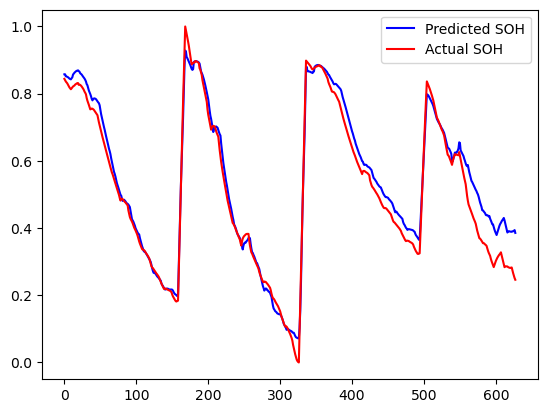

In [55]:
combined_datap = np.concatenate((trainPredict,valPredict, testPredict), axis=0)
combined_data = np.concatenate((y_train,y_val,y_test), axis=0)
plt.plot(combined_datap, color = 'blue', label = 'Predicted SOH')
plt.plot(combined_data, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

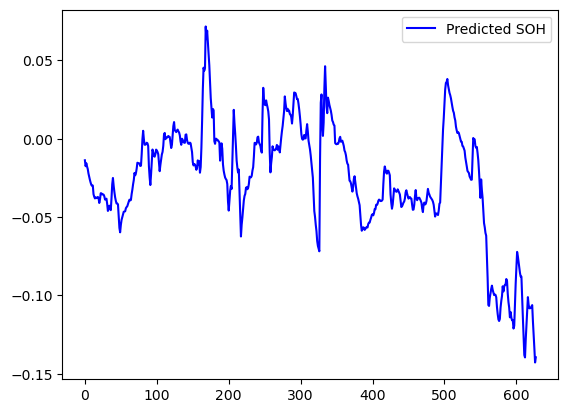

In [56]:
plt.plot(combined_data-combined_datap, color = 'blue', label = 'Predicted SOH')


plt.legend()
plt.show()  

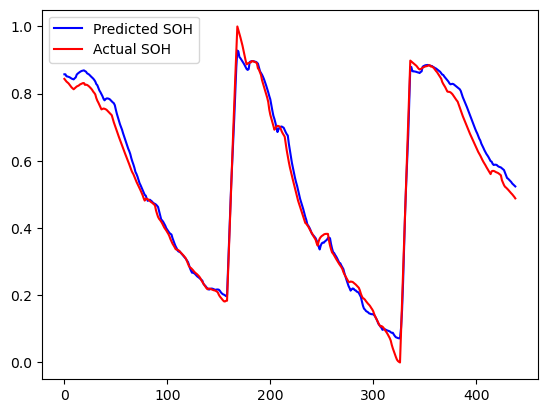

In [57]:
plt.plot(trainPredict, color = 'blue', label = 'Predicted SOH')
plt.plot(y_train, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

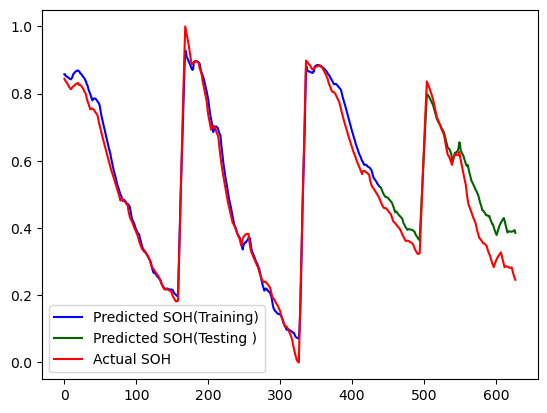

In [83]:
X_data = np.arange(439, 628)
                   
combined_datap = np.concatenate((trainPredict,valPredict, testPredict), axis=0)
combined_data = np.concatenate((y_train,y_val,y_test), axis=0)
plt.plot(trainPredict,color = 'blue', label = 'Predicted SOH(Training)')
z=np.concatenate((valPredict,testPredict), axis=0)
plt.plot( X_data,z,color = 'darkgreen', label = 'Predicted SOH(Testing )')
plt.plot(combined_data, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

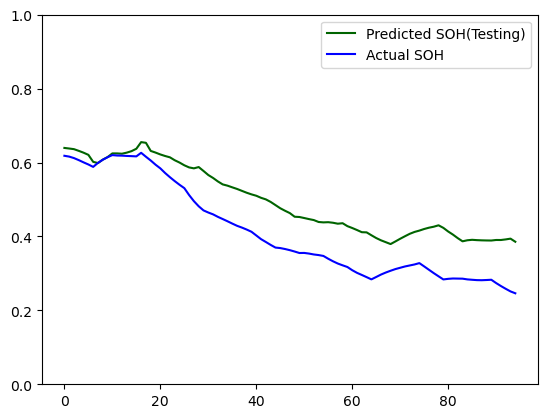

In [84]:
plt.plot(testPredict, color = 'darkgreen', label = 'Predicted SOH(Testing)')
plt.plot(y_test, color = 'blue', label = 'Actual SOH')
yticks_positions = [0,0.2,0.4,0.6,0.8,1]
plt.yticks(yticks_positions)
plt.legend()
plt.show()

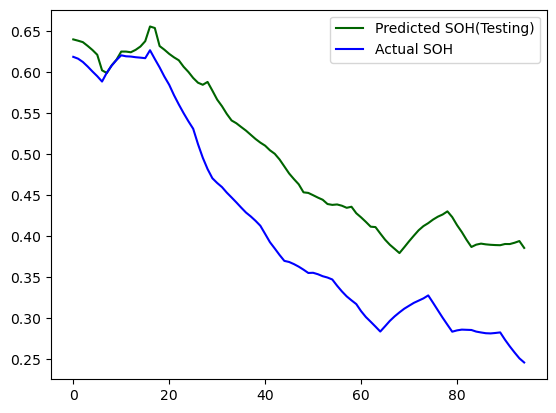

In [85]:
plt.plot(testPredict, color = 'darkgreen', label = 'Predicted SOH(Testing)')
plt.plot(y_test, color = 'blue', label = 'Actual SOH')

plt.legend()
plt.show()

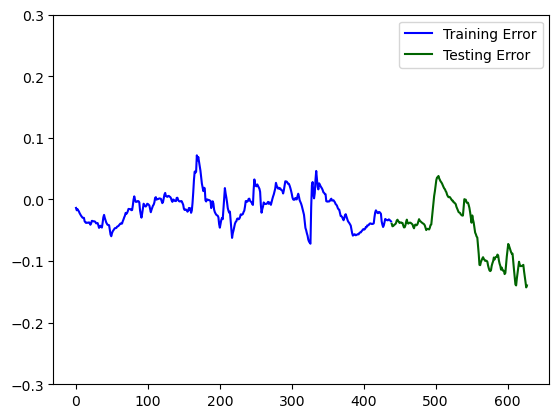

In [86]:
plt.plot(y_train-trainPredict, color = 'blue', label = 'Training Error')
#plt.plot(combined_data-combined_datap, color = 'blue', label = 'Error')
X_data = np.arange(439, 628)
z=np.concatenate((valPredict,testPredict), axis=0)
p=np.concatenate((y_val,y_test), axis=0)
plt.plot(X_data,p-z, color = 'darkgreen', label = 'Testing Error')
yticks_positions = [-0.3, -0.2,-0.1,0.0 ,0.1,0.2,0.3]
#yticks_labels = ['0%', '20%', '40%', '60%', '80%', '100%']

# Apply the yticks
#plt.yticks(yticks_positions, yticks_labels)
plt.yticks(yticks_positions)
plt.legend()
plt.show()  


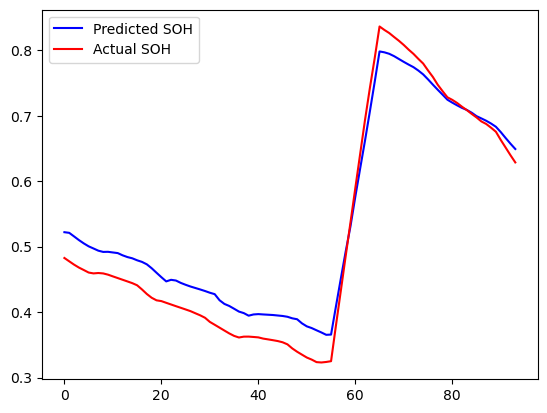

In [58]:
plt.plot(valPredict, color = 'blue', label = 'Predicted SOH')
plt.plot(y_val, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

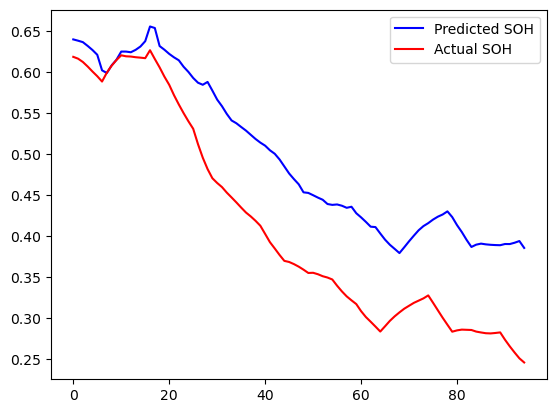

In [59]:
plt.plot(testPredict, color = 'blue', label = 'Predicted SOH')
plt.plot(y_test, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

In [60]:
r2_score(combined_data, combined_datap)

0.9630568371752639

In [61]:
trainPredict

array([[0.857743],
       [0.857601],
       [0.851746],
       [0.851162],
       [0.850114],
       [0.848995],
       [0.847012],
       [0.844918],
       [0.843839],
       [0.842551],
       [0.845847],
       [0.848506],
       [0.856797],
       [0.859876],
       [0.862403],
       [0.864567],
       [0.866494],
       [0.867854],
       [0.868628],
       [0.869416],
       [0.867174],
       [0.865412],
       [0.860802],
       [0.858852],
       [0.856995],
       [0.853716],
       [0.850701],
       [0.847868],
       [0.844881],
       [0.840923],
       [0.836197],
       [0.828548],
       [0.825166],
       [0.817521],
       [0.809496],
       [0.804483],
       [0.798787],
       [0.792479],
       [0.784809],
       [0.780124],
       [0.78373 ],
       [0.785774],
       [0.78589 ],
       [0.784986],
       [0.783561],
       [0.780422],
       [0.777715],
       [0.774113],
       [0.771716],
       [0.765534],
       [0.751881],
       [0.739749],
       [0.72

In [62]:
X_data = np.arange(1, 170)


In [63]:
y_data = []

for i in range(1, 170):
    data = trainPredict[i]
    y_data.append(data)

y_data = np.array(y_data)

In [64]:
y_data1 = np.concatenate(trainPredict[1:170])
y_realt = np.concatenate(y_train[1:170])

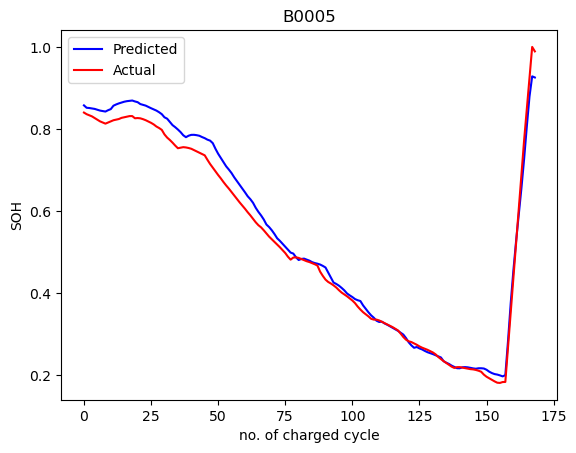

In [65]:
plt.plot(y_data ,color='blue', label='Predicted')

plt.plot(y_realt ,color='red', label='Actual')

plt.xlabel('no. of charged cycle')
plt.ylabel('SOH')
plt.title('B0005')
plt.legend()

# Displaying the plot
plt.show()

In [66]:


def sum_squared_error(y_real, y_pred):
    
    y_real = np.array(y_real)
    y_pred = np.array(y_pred)
    squared_errors = (y_real - y_pred) ** 2
    sum_squared_errors = np.sum(squared_errors)
    return sum_squared_errors

In [67]:
sse = sum_squared_error(y_realt, y_data1)
print("Sum of squared errors:", sse)

Sum of squared errors: 0.12993225271883596


In [68]:
def Slope(x, y, n):
    X = sum(x)
    Y = sum(y)
    XY = 0
    X2 = 0
    for i in range(n):
        XY = XY + (x[i] * y[i])
        X2 = X2 + (x[i] * x[i])
    m = (n * XY - X * Y) / (n * X2 - X * X)
    return m

def leastSquareLine(X, Y, n):
    m = Slope(X, Y, n)
    Xmean = sum(X) / n
    Ymean = sum(Y) / n
    c = Ymean - m * Xmean
    return m, c


n = len(X_data)
m, c = leastSquareLine(X_data, y_data, n)

print("Slope (m):", m)
print("Intercept (c):", c)


Slope (m): [-0.003978]
Intercept (c): [0.878955]


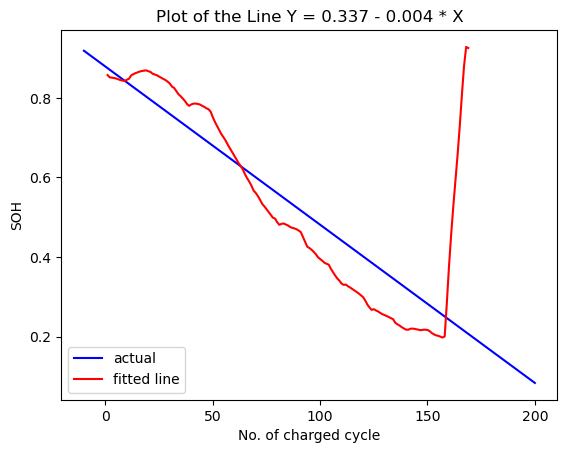

In [69]:
x_values = np.linspace(-10, 200, 100)
y_values = m * x_values + c

# Plotting the line
plt.plot(x_values, y_values, color='blue',label='actual')

# Plotting the data points
plt.plot(X_data, y_data, color='red',label='fitted line')

plt.ylabel('SOH')
plt.xlabel('No. of charged cycle')
plt.title('Plot of the Line Y = 0.337 - 0.004 * X')
plt.legend()


plt.show()


In [70]:
X_data = np.arange(1, 170)

In [71]:
y_data = []

for i in range(170, 170+169):
    data = trainPredict[i]
    y_data.append(data)

y_data = np.array(y_data)

In [72]:
y_data1 = np.concatenate(trainPredict[170:339])
y_realt = np.concatenate(y_train[170:339])

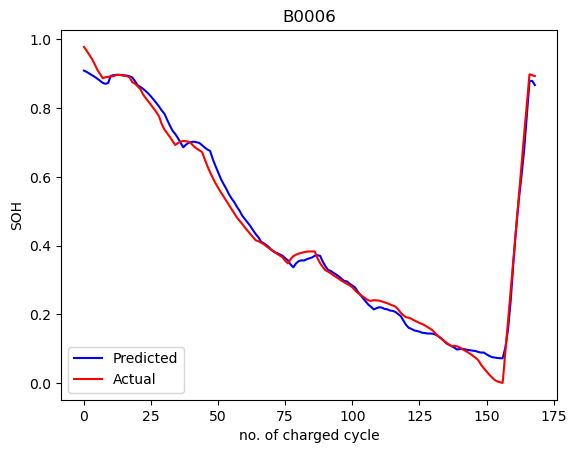

In [73]:
plt.plot(y_data ,color='blue', label='Predicted')

plt.plot(y_realt ,color='red', label='Actual')

plt.xlabel('no. of charged cycle')
plt.ylabel('SOH')
plt.title('B0006')
plt.legend()

# Displaying the plot
plt.show()

In [74]:

def sum_squared_error(y_real, y_pred):
    
    y_real = np.array(y_real)
    y_pred = np.array(y_pred)
    squared_errors = (y_real - y_pred) ** 2
    sum_squared_errors = np.sum(squared_errors)
    return sum_squared_errors

In [75]:
sse = sum_squared_error(y_realt, y_data1)
print("Sum of squared errors:", sse)

Sum of squared errors: 0.11609881500218086


In [76]:
def Slope(x, y, n):
    X = sum(x)
    Y = sum(y)
    XY = 0
    X2 = 0
    for i in range(n):
        XY = XY + (x[i] * y[i])
        X2 = X2 + (x[i] * x[i])
    m = (n * XY - X * Y) / (n * X2 - X * X)
    return m

def leastSquareLine(X, Y, n):
    m = Slope(X, Y, n)
    Xmean = sum(X) / n
    Ymean = sum(Y) / n
    c = Ymean - m * Xmean
    return m, c


n = len(X_data)
m, c = leastSquareLine(X_data, y_data, n)

print("Slope (m):", m)
print("Intercept (c):", c)


Slope (m): [-0.004607]
Intercept (c): [0.839007]


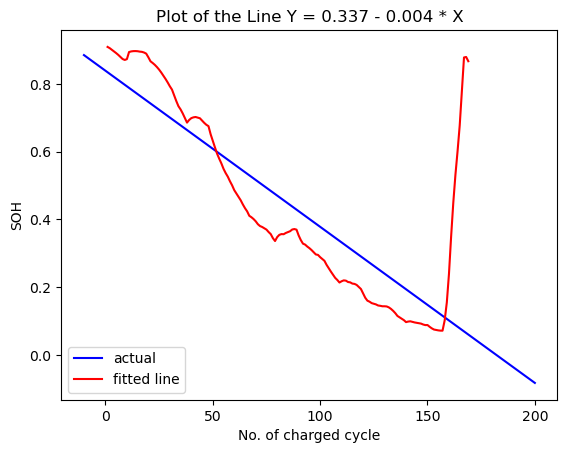

In [77]:
x_values = np.linspace(-10, 200, 100)
y_values = m * x_values + c

# Plotting the line
plt.plot(x_values, y_values, color='blue',label='actual')

# Plotting the data points
plt.plot(X_data, y_data, color='red',label='fitted line')

plt.ylabel('SOH')
plt.xlabel('No. of charged cycle')
plt.title('Plot of the Line Y = 0.337 - 0.004 * X')
plt.legend()


plt.show()


In [78]:
import tensorflow as tf

# Define and train your TensorFlow model
model = model

# Save the model in the SavedModel format
tf.saved_model.save(model, './saved_model')


INFO:tensorflow:Assets written to: ./saved_model\assets


INFO:tensorflow:Assets written to: ./saved_model\assets


In [79]:
import tensorflow as tf

# Define and train your TensorFlow model
model = model



In [80]:
# Save the model in the SavedModel format
tf.saved_model.save(model, './saved_model')

INFO:tensorflow:Assets written to: ./saved_model\assets


INFO:tensorflow:Assets written to: ./saved_model\assets


In [81]:
model.save('./saved_model')

INFO:tensorflow:Assets written to: ./saved_model\assets


INFO:tensorflow:Assets written to: ./saved_model\assets
